# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Datasets

In [2]:
TRAVEL_SENTENCES_TYPE = "TRAVEL"
FAKE_SENTENCES_TYPE = "FAKE"

travel_sentences = pd.read_csv('../data/travel_order_data.csv', header=None, names=([TRAVEL_SENTENCES_TYPE]))
fake_sentences = pd.read_csv('../data/random_sentence_wikipedia.csv',usecols=[0], header=None, names=([FAKE_SENTENCES_TYPE]))

In [3]:
travel_sentences.head()

,TRAVEL
0,Je veux savoir comment aller à {{ARRIVAL}} dep...
1,Je veux savoir comment aller à {{ARRIVAL}} en ...
2,Je veux savoir comment aller vers {{ARRIVAL}} ...
3,Je veux savoir comment aller vers {{ARRIVAL}} ...
4,Je veux savoir comment arriver à {{ARRIVAL}} d...


In [4]:
fake_sentences.head()

,FAKE
0,Pour les articles homonymes voir Castex
1,Castex en occitan Castèths est une commune fra...
2,Sur le plan historique et culturel la commune...
3,Exposée à un climat océanique altéré elle est...
4,Castex est une commune rurale qui compte 93 h...


In [5]:
print(travel_sentences['TRAVEL'].iloc[19])
print(fake_sentences['FAKE'].iloc[19])

Je veux savoir comment me rendre vers {{ARRIVAL}} en partant de {{DEPARTURE}}
  Laltitude du territoire varie entre 248 m et 394 m


In [6]:
def addLabel(pd, label):
    for index, row in pd.iterrows():
        X.append(row[label])
        Y.append(label)

In [7]:
X = []
Y = []

addLabel(travel_sentences, TRAVEL_SENTENCES_TYPE)
addLabel(fake_sentences, FAKE_SENTENCES_TYPE)

In [8]:
print(X[1])
print(X[-1])
print(len(X))

Je veux savoir comment aller à {{ARRIVAL}} en partant de {{DEPARTURE}}
 Begović est en outre accusé davoir participé à des passages à tabac avec dautres gardes qui ont causé la mort de plusieurs détenus
105618


In [9]:
print(Y[1])
print(Y[-1])
print(len(Y))

TRAVEL
FAKE
105618


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
index = 15209
print(X_train[index])
print(Y_train[index])

Les 2400 officiers de police assermentés de lAPD sont armés de pistolet semiautomatique Smith  Wesson MP40 depuis 2011
FAKE


In [12]:
print('Train length X :',len(X_train))
print('Train length Y :',len(Y_train))

print('Test length X :',len(X_test))
print('Test length Y :',len(Y_test))

Train length X : 84494
Train length Y : 84494
Test length X : 21124
Test length Y : 21124


# Model

In [13]:
training_set = pd.DataFrame({'X': X_train, 'Y': Y_train})
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(training_set['X'].values)

In [14]:
classifier = MultinomialNB()
targets = training_set['Y'].values
classifier.fit(counts, targets)

MultinomialNB()

In [15]:
examples = ["comment me rendre de Paris à Brest", "j'aime le fromage"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
print(predictions)

['TRAVEL' 'FAKE']


# Result

In [16]:
X_test_vectorized = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_vectorized)

In [17]:
print(y_pred)

['FAKE' 'FAKE' 'TRAVEL' ... 'FAKE' 'FAKE' 'TRAVEL']


In [18]:
acc_test = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy for test',acc_test)

Accuracy for test 0.9996686233667866


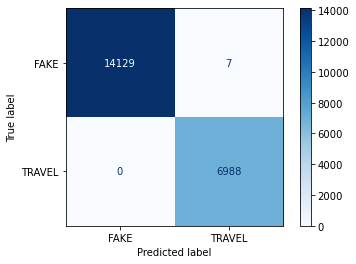

In [19]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test_vectorized, Y_test, cmap=plt.cm.Blues)